<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0036_AluraBB_MuitasDimensoes01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if not os.path.isfile('/content/exames.csv'):
    ! wget https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/exames.csv
! ls

--2022-01-11 20:03:29--  https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/exames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169238 (165K) [text/plain]
Saving to: ‘exames.csv’

exames.csv          100%[===================>] 165.27K  --.-KB/s    in 0.02s   

2022-01-11 20:03:29 (8.63 MB/s) - ‘exames.csv’ saved [169238/169238]

exames.csv  sample_data


# Etapas de um estudo de Machine Learning:


1.   Entrada de dados
2.   Pré-processamento e transformação dos dados
3.   Segregação: Conjunto de treinamento, (conjunto de validação), conjunto de teste
4.   Construção do modelo
5.   Validação e teste do modelo
6.   Loop de treino e testes
7.   Implementação do modelo

## Foco desse curso:
Pré-processamento e transformação nos dados em dados com alta dimensionalidade.





# Dados do curso:
Diagnóstico de tumores entre Maligno e Benigno a partir de matriz de 33 dimensões (33 tipos de exame). A intenção é reduzir para aproximadamente 5 dimensões.

## Importando:

In [2]:
import pandas as pd
resultados_exames = pd.read_csv('exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
resultados_exames.shape

(569, 35)

# Primeiro modelo = Random Forest

### Train test split

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [5]:
print(treino_x.shape)
print(teste_x.shape)
print(treino_y.shape)
print(teste_y.shape)

(426, 33)
(143, 33)
(426,)
(143,)


In [6]:
426/569

0.7486818980667839

In [7]:
143/569

0.2513181019332162

In [8]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.017080,0.003806,9.628,19.62,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.580,0.005768,0.008082,0.01510,0.006451,0.013470,0.001828,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.740,0.008902,0.047850,0.07339,0.017450,0.027280,0.007610,11.690,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.630,0.015460,0.025400,0.02197,0.015800,0.039970,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.000,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [9]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

## Treinando

In [10]:
# esse códido dá o erro: "ValueError: Input contains NaN, infinity or a value too large for dtype('float32')."

# from sklearn.ensemble import RandomForestClassifier

# classificador = RandomForestClassifier() # default n_estimators (árvores = 100)
# classificador.fit(treino_x, treino_y)
# predicao = classificador.predict(teste_x)
# acuracia = classificador.score(teste_x, teste_y)
# print(acuracia)

### Detectando NaN

Tivemos o erro acima porque a base não passou por pré-processamento limpando os NaN

In [11]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Percebo que só a coluna 'exame_33' tem dados vazios (75% dos dados são vazios). Pela proporção, a melhor solução é remover a coluna.

In [12]:
from sklearn.model_selection import train_test_split
from numpy import random
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns='exame_33') # removendo a coluna

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier() # default n_estimators (árvores = 100)
classificador.fit(treino_x, treino_y)
# predicao = classificador.predict(teste_x)
acuracia = classificador.score(teste_x, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)

Resultado da classificação: 92.40%


# Criando um modelo de base (baseline)

In [13]:
from sklearn.dummy import DummyClassifier
from numpy import random
SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent") # classificando tudo pela classe mais frequente
classificador_bobo.fit(treino_x, treino_y)
# predicao = classificador_bobo.predict(teste_x)
acuracia = classificador_bobo.score(teste_x, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)


Resultado da classificação: 66.67%


O classificador Random Forest é um bom classificador, pois atingiu 92,4% de acurácia contra 66,67% do classificador dummy. 

A partir de agora usaremos o Random Forest como **baseline** para melhorar nosso modelo.

# Gerando uma visualização

In [14]:
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

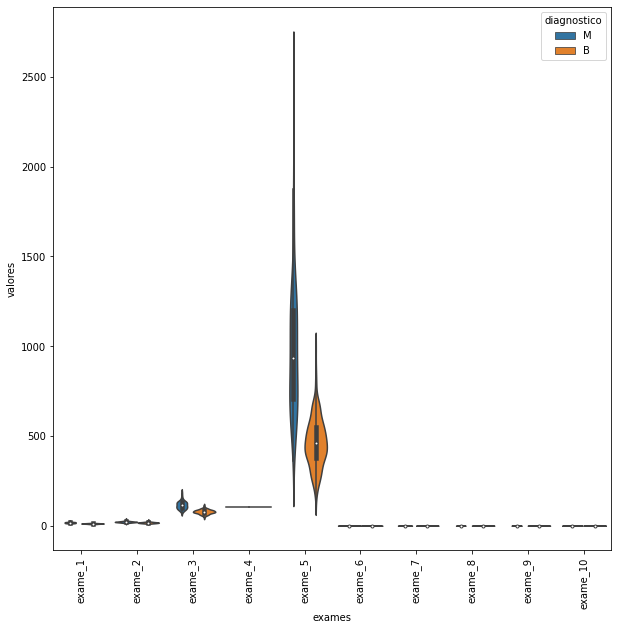

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

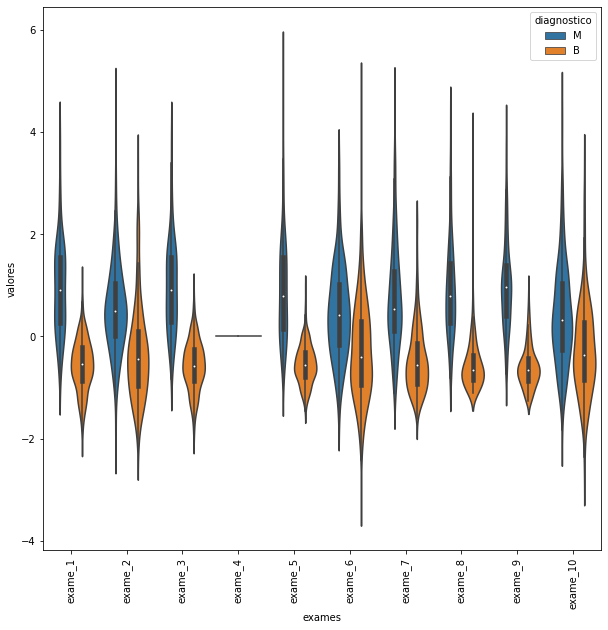

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

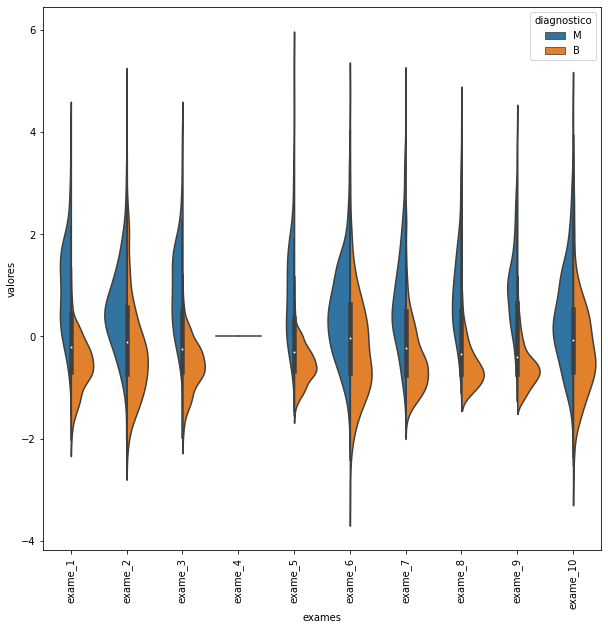

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot, split = True)
plt.xticks(rotation=90)

In [18]:
valores_exames_v2.exame_4

0      1.421085e-14
1      1.421085e-14
2      1.421085e-14
3      1.421085e-14
4      1.421085e-14
           ...     
564    1.421085e-14
565    1.421085e-14
566    1.421085e-14
567    1.421085e-14
568    1.421085e-14
Name: exame_4, Length: 569, dtype: float64

In [19]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

A variável "exame_4" apresenta valores constantes, é inútil para a classificação.

In [20]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot, split = True)
    plt.xticks(rotation=90)

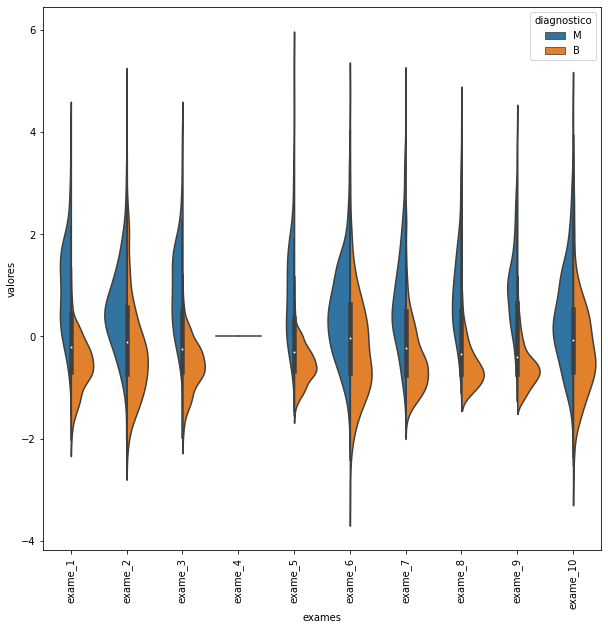

In [21]:
grafico_violino(valores_exames_v2, 0, 10)

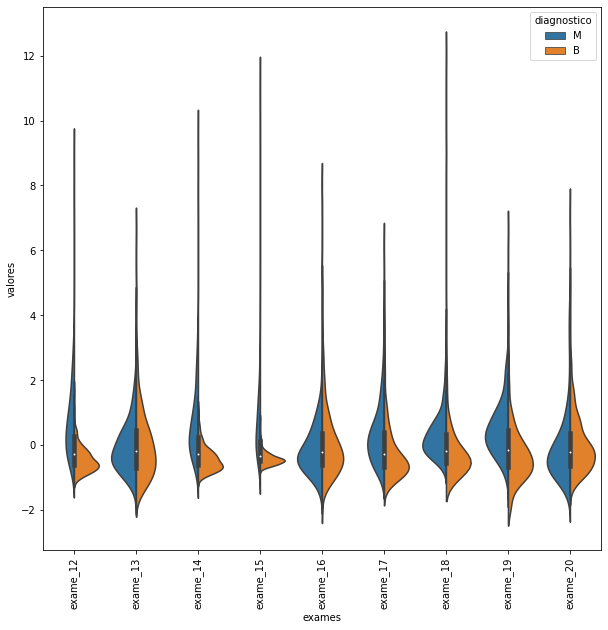

In [22]:
grafico_violino(valores_exames_v2, 11, 20)

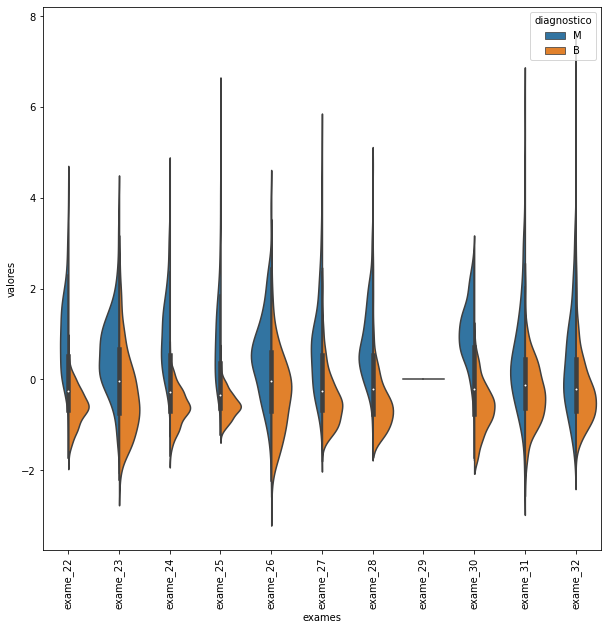

In [23]:
grafico_violino(valores_exames_v2, 21, 50)

Além do 'exame_4', a 'exame_29' também apresenta valores constantes. Posso excluí-las.

In [24]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])
valores_exames_v3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Nova Classificação

In [25]:
def classificar(valores):

    from sklearn.model_selection import train_test_split
    from numpy import random
    SEED = 1234
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)

    from sklearn.ensemble import RandomForestClassifier

    classificador = RandomForestClassifier() # default n_estimators (árvores = 100)
    classificador.fit(treino_x, treino_y)
    # predicao = classificador.predict(teste_x)
    acuracia = classificador.score(teste_x, teste_y) * 100
    print('Resultado da classificação: %.2f%%' % acuracia)

In [26]:
classificar(valores_exames_v2)

Resultado da classificação: 92.40%


In [27]:
classificar(valores_exames_v3)

Resultado da classificação: 92.98%


# Verificando correlações e excluindo features altamente correlacionadas

In [28]:
# função "corr" do Pandas

valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


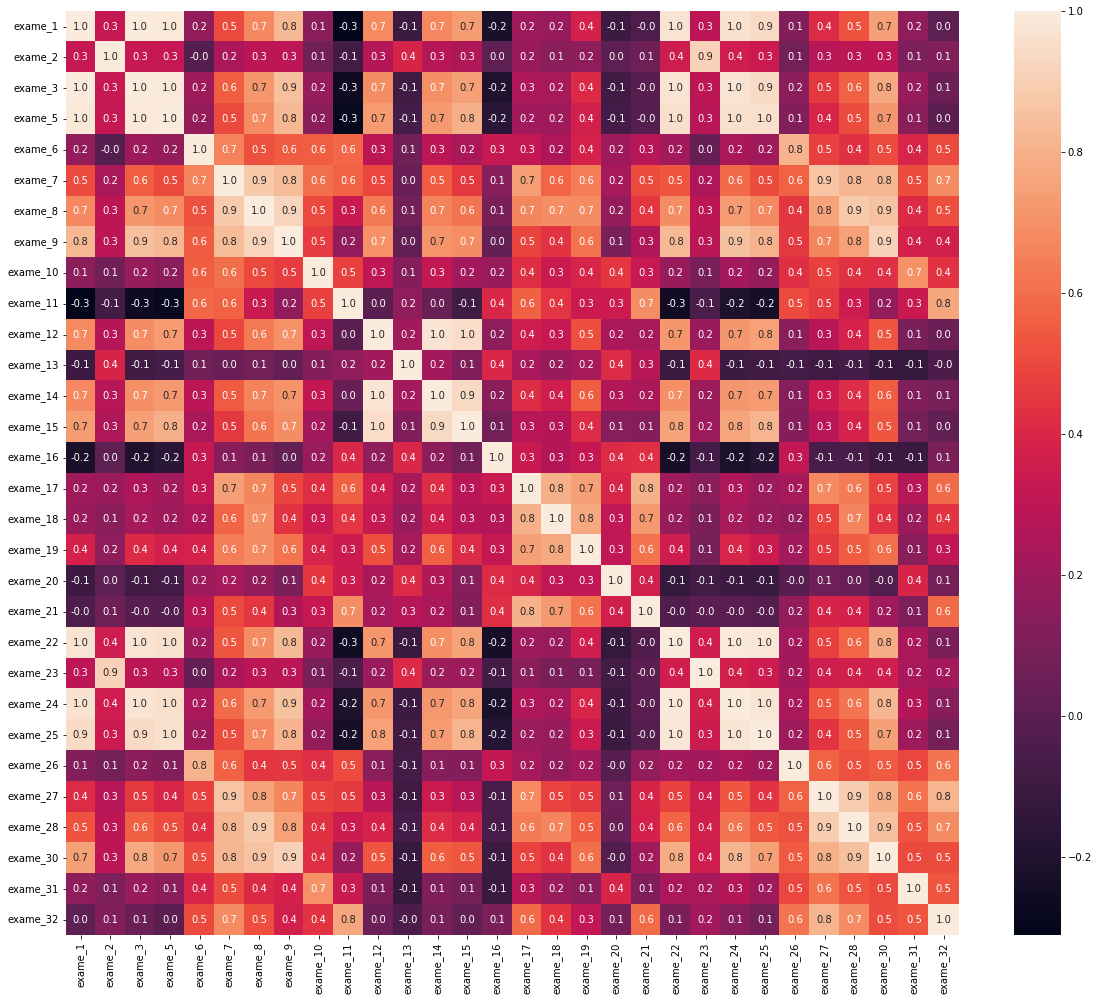

In [29]:
# mapa de calor do seaborn

matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(20, 17))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

A ideia após essa análise é excluir as variáveis altamente correlacionadas fora da diagonal principal (que é da feature para ela mesma).

In [30]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [32]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [33]:
variaveis_correlacionadas.index

Index(['exame_1', 'exame_3', 'exame_22', 'exame_24'], dtype='object')

In [34]:
variaveis_correlacionadas.keys()

Index(['exame_1', 'exame_3', 'exame_22', 'exame_24'], dtype='object')

In [35]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.index)
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Nova Classificação

In [36]:
classificar(valores_exames_v4)

Resultado da classificação: 91.81%


Eu exclui todas as variáveis correlacionadas... mas eu deveria ter excluído só uma dos pares de correções.

In [37]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
valores_exames_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Nova classificação

In [38]:
classificar(valores_exames_v5)

Resultado da classificação: 92.98%


Não saiu dos 92.98%, ou seja, excluímos 2 features sem prejudicar o desempenho do modelo.

**P.s.: verificar a questão da correlação x causalidade: nem sempre alta correlação indica causalidade**

Ver: https://www.tylervigen.com/spurious-correlations

# Selecionando as k melhores features para nosso modelo

In [39]:
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24']) 
# como vou utilizar como parâmetro a função de probabilidade qui-quadrado, que não aceita valores negativos, vou precisar
# fazer a seleção de k melhores features com os valores antes da normalização, então vou excluir as features a partir dos valores_exames_v1
valores_exames_v6.shape

(569, 28)

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
SEED = 1234
random.seed(SEED)

selecionar_kmelhores = SelectKBest(chi2, k = 5)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [41]:
treino_kbest.shape

(398, 5)

In [42]:
teste_kbest.shape

(171, 5)

In [43]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
acuracia = classificador.score(teste_kbest, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)

Resultado da classificação: 92.40%


In [44]:
# esse teste foi por minha conta (vamos ver o que dá):

for i in range(1, 29):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    from sklearn.model_selection import train_test_split
    SEED = 1234
    random.seed(SEED)

    selecionar_kmelhores = SelectKBest(chi2, k = i)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

    selecionar_kmelhores.fit(treino_x, treino_y)
    treino_kbest = selecionar_kmelhores.transform(treino_x)
    teste_kbest = selecionar_kmelhores.transform(teste_x)
    classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
    classificador.fit(treino_kbest, treino_y)
    acuracia = classificador.score(teste_kbest, teste_y) * 100
    print('i = ', i)
    print('Resultado da classificação: %.2f%%' % acuracia)
    print('--------')

i =  1
Resultado da classificação: 84.80%
--------
i =  2
Resultado da classificação: 92.40%
--------
i =  3
Resultado da classificação: 92.98%
--------
i =  4
Resultado da classificação: 92.40%
--------
i =  5
Resultado da classificação: 92.40%
--------
i =  6
Resultado da classificação: 92.98%
--------
i =  7
Resultado da classificação: 94.15%
--------
i =  8
Resultado da classificação: 94.74%
--------
i =  9
Resultado da classificação: 95.32%
--------
i =  10
Resultado da classificação: 95.91%
--------
i =  11
Resultado da classificação: 94.74%
--------
i =  12
Resultado da classificação: 95.32%
--------
i =  13
Resultado da classificação: 94.15%
--------
i =  14
Resultado da classificação: 92.98%
--------
i =  15
Resultado da classificação: 93.57%
--------
i =  16
Resultado da classificação: 93.57%
--------
i =  17
Resultado da classificação: 94.15%
--------
i =  18
Resultado da classificação: 93.57%
--------
i =  19
Resultado da classificação: 93.57%
--------
i =  20
Resultado da 

Dez variáveis pareceu ótimo

# Adicionando a **matriz de confusão**

Lembre-se que por ser área da saúde um falso-negativo pode ser muito prejudicial, então a matriz de confusão deve ser analisada com responsabilidade.

In [45]:
# com 5 k melhores features 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
SEED = 1234
random.seed(SEED)

selecionar_kmelhores = SelectKBest(chi2, k = 5)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)


from sklearn.metrics import confusion_matrix

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
acuracia = classificador.score(teste_kbest, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

Resultado da classificação: 92.40%


array([[100,   5],
       [  8,  58]])

[Text(30.5, 0.5, 'Real'), Text(0.5, 12.5, 'Predição')]

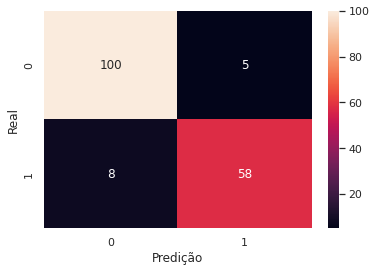

In [46]:
# visualizando e interpretando
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [47]:
# com 10 k melhores features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
SEED = 1234
random.seed(SEED)

selecionar_kmelhores = SelectKBest(chi2, k = 10)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)


from sklearn.metrics import confusion_matrix

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
acuracia = classificador.score(teste_kbest, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

Resultado da classificação: 95.91%


array([[105,   0],
       [  7,  59]])

[Text(30.5, 0.5, 'Real'), Text(0.5, 12.5, 'Predição')]

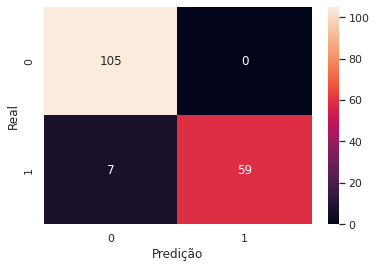

In [48]:
# visualizando e interpretando
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

# Análise

Aqui quando o real é 1 (câncer maligno) e a predição dá 0 (câncer benigno) teríamos um problema sério. A análise com 10 k melhores features é melhor que com 5.

# RFE ==> Eliminação recursiva de atributos (Recursive Feature Elimination)

Resultado da classificação: 90.06%


[Text(30.5, 0.5, 'Real'), Text(0.5, 12.5, 'Predição')]

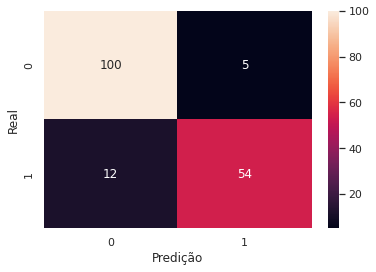

In [52]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)


from sklearn.metrics import confusion_matrix

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfe, treino_y)
acuracia = classificador.score(teste_rfe, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

# RFECV - Recursive Feature Elination Cross-Validation

Resultado da classificação: 92.98%


[Text(30.5, 0.5, 'Real'), Text(0.5, 12.5, 'Predição')]

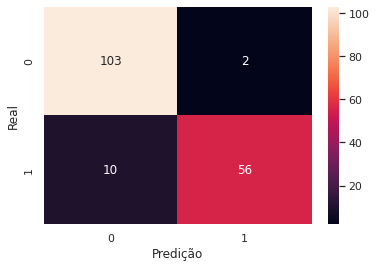

In [54]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring='accuracy') # cv => em quantos estratos vou dividir minha base de dados
                                                                                            # como para treinamento com cross-validation
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)


from sklearn.metrics import confusion_matrix

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_rfecv, treino_y)
acuracia = classificador.score(teste_rfecv, teste_y) * 100
print('Resultado da classificação: %.2f%%' % acuracia)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [59]:
treino_rfecv.shape # quantas features

(398, 26)

In [60]:
# para saber quais features ele selecionou:

selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [61]:
treino_x.columns[selecionador_rfecv.support_] # para 'ver' quais foram as features selecionadas

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [66]:
selecionador_rfecv.grid_scores_ # vai ser depreciado, utilize "cv_results_"

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

In [67]:
selecionador_rfecv.cv_results_

{'mean_test_score': array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
        0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
        0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
        0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
        0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
        0.96981013, 0.96231013, 0.95984177]),
 'split0_test_score': array([0.85  , 0.9375, 0.925 , 0.9125, 0.9375, 0.9375, 0.9375, 0.925 ,
        0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.95  , 0.95  , 0.95  ,
        0.95  , 0.9375, 0.9625, 0.9375, 0.925 , 0.925 , 0.95  , 0.925 ,
        0.9375, 0.975 , 0.95  , 0.95  ]),
 'split1_test_score': array([0.8875, 0.9375, 0.95  , 0.95  , 0.9375, 0.95  , 0.95  , 0.975 ,
        0.9625, 0.9625, 0.975 , 0.9625, 0.95  , 0.9625, 0.95  , 0.9625,
        0.975 , 0.95  , 0.9625, 0.9625, 0.9625, 0.9375, 0.9625, 0.95  ,
        0.95  , 0.975 , 0.975 , 0.95  ]),
 'split2_test_score': array([0.8625, 

In [79]:
selecionador_rfecv.cv_results_['mean_test_score']

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

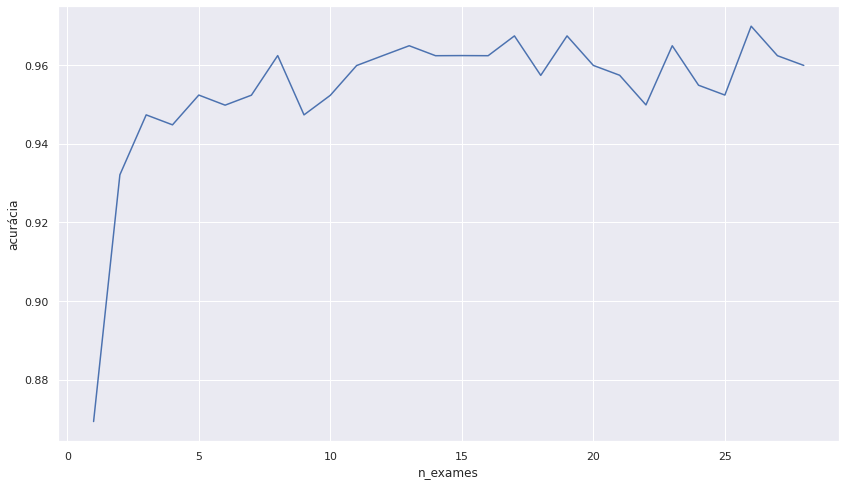

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel('n_exames')
plt.ylabel('acurácia')
plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score'])+1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show()

O REFCV selecionou 26 features... O melhor resultado obtive recursivamente com o SelectKBest (até agora).


# Visualizando dados no plano

In [86]:
# reduzindo para só duas dimensões

Resultado da classificação 87.13%


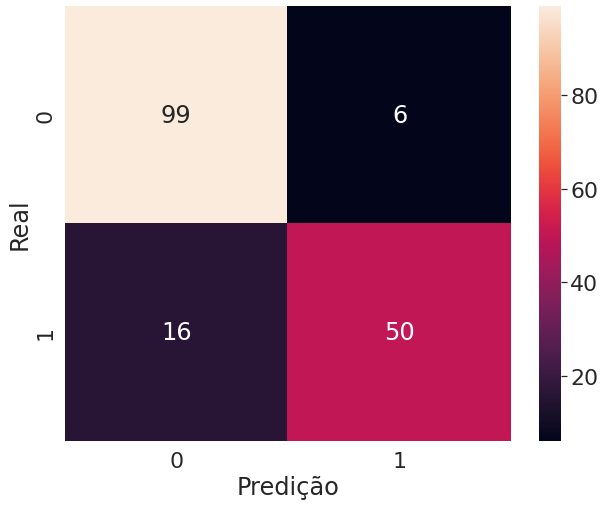

In [83]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [84]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

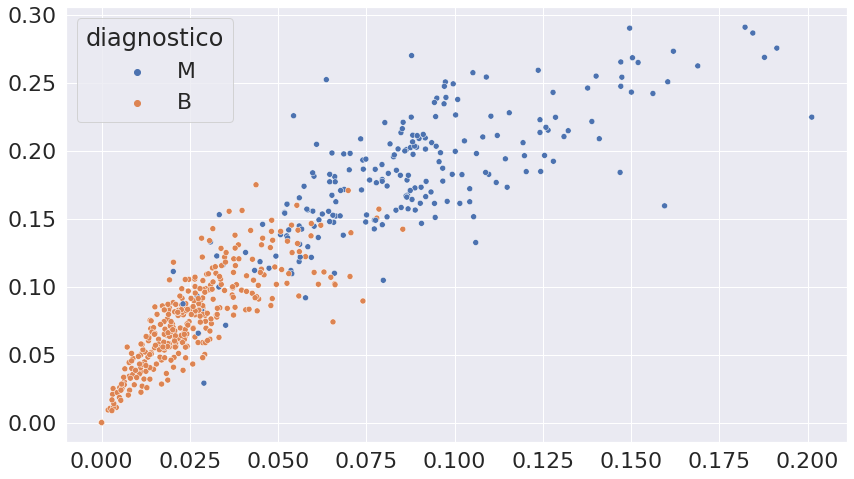

In [85]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

Entrentanto selecionando só duas features, eu perco muita informação. Qual seria a saída? Utilizar a PCA para redução de dimensionalidade, por exemplo. Aí eu ploto os diagnósticos no eixo das componentes principais.

# PCA

## com os dados **não normalizados** (padronizados)

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

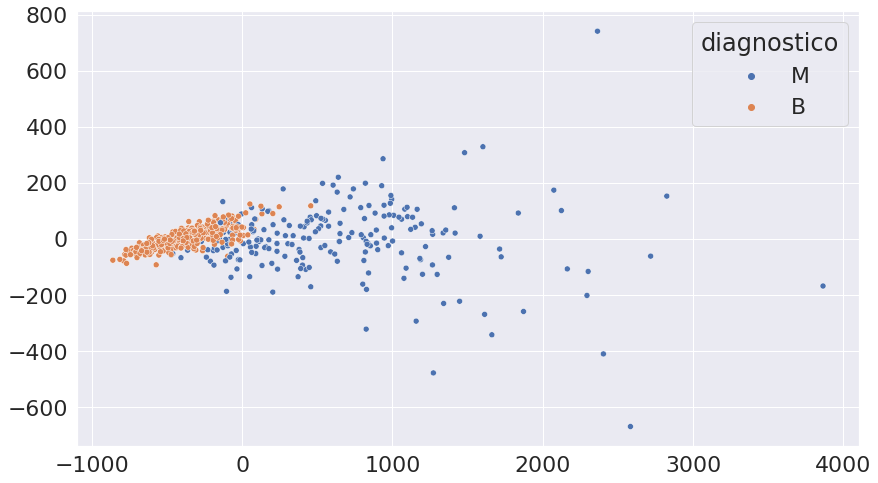

In [88]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

## com os dados **normalizados** (padronizados)

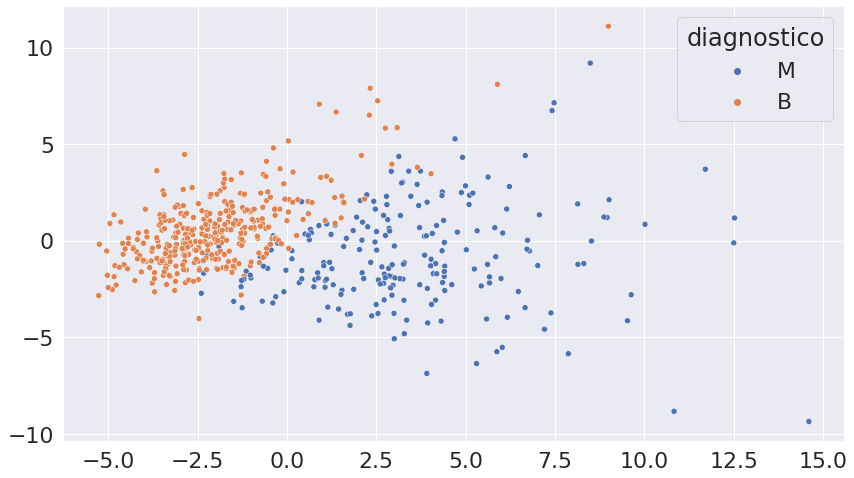

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

Mas tem algo ainda melhor do que PCA quando o objetivo é gerar uma visualização.

É o TSNE - T-distributed Stochastic Neighbor Embedding.

Vamos ver como isso funciona:

# TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


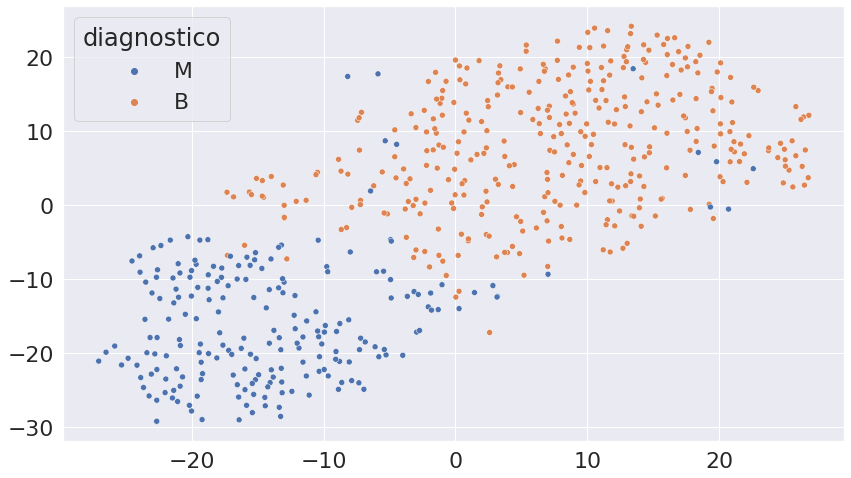

In [94]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)
plt.show()

Basicamente o TSNE utiliza uma distribuição t-Student para fazer com que os pontos fiquem equidistantes em duas dimensões.